# 题目一
下载并用pandas导入sz50.xlsx的所有股票，索引设置为datetime，将所有股票的keys打印出来。

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_excel('sz50.xlsx',None)
keys = list(data.keys())
data_dict = {}
for s in keys:
    data =  pd.read_excel('sz50.xlsx',sheetname=s, index_col='datetime')
    data_dict[s] = data
PN = pd.Panel(data_dict)
MI = PN.transpose(2,1,0)
print(MI.minor_axis)

Index(['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG',
       '600030.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG',
       '600100.XSHG', '600104.XSHG', '600111.XSHG', '600340.XSHG',
       '600485.XSHG', '600518.XSHG', '600519.XSHG', '600547.XSHG',
       '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG',
       '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG',
       '601166.XSHG', '601169.XSHG', '601186.XSHG', '601198.XSHG',
       '601211.XSHG', '601229.XSHG', '601288.XSHG', '601318.XSHG',
       '601328.XSHG', '601336.XSHG', '601390.XSHG', '601398.XSHG',
       '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG',
       '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG',
       '601857.XSHG', '601881.XSHG', '601901.XSHG', '601985.XSHG',
       '601988.XSHG', '601989.XSHG'],
      dtype='object')


# 题目二：
读取data里的600036这只股票的DataFrame,将其收盘价转换成用Numpy的Array格式，并用talib计算10日均线值，返回ndarray的最后五个值

In [8]:
import matplotlib.pyplot as plt
import talib as ta

In [9]:
close = pd.read_excel('sz50.xlsx',sheetname='600036.XSHG',index_col='datetime').close
close_arr = np.array(close)

In [10]:
ma = ta.MA(close,timeperiod=10,matype=0)
print(np.array(ma.tail(5)))

[108.35  108.741 109.176 110.102 111.666]


# 题目三：
将MA的ndarray数据转换成Series格式，并将价格和MA值用Matplotlib展示出来

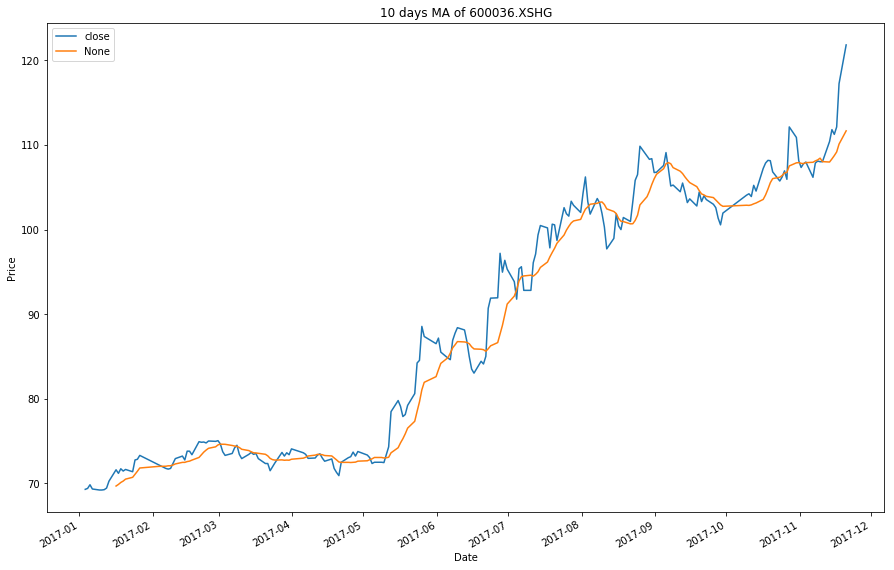

In [11]:
# plt.subplot(212)
plt.figure(figsize=(15,10))
close.plot()
ma.plot()
plt.title("10 days MA of 600036.XSHG")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# 题目四：
用talib计算50只股票的周期为5的ROCR100，生成Dataframe，并将前5只股票的 ROCR100（参数timeperiod=20）用一张图显示出来。

In [13]:
rocr10 = pd.DataFrame()
for s in keys:
    rocr10[s] = ta.ROCR100(PN[s,:,'close'].fillna(0),timeperiod=20).fillna(100)
    for i in range(rocr10[s].shape[0]):
        if rocr10[s][i]==0.:
            rocr10[s][i] = 100.
print(rocr10)

                     600000.XSHG  600016.XSHG  600028.XSHG  600029.XSHG  \
datetime                                                                  
2017-01-03 15:00:00   100.000000   100.000000   100.000000   100.000000   
2017-01-04 15:00:00   100.000000   100.000000   100.000000   100.000000   
2017-01-05 15:00:00   100.000000   100.000000   100.000000   100.000000   
2017-01-06 15:00:00   100.000000   100.000000   100.000000   100.000000   
2017-01-09 15:00:00   100.000000   100.000000   100.000000   100.000000   
2017-01-10 15:00:00   100.000000   100.000000   100.000000   100.000000   
2017-01-11 15:00:00   100.000000   100.000000   100.000000   100.000000   
2017-01-12 15:00:00   100.000000   100.000000   100.000000   100.000000   
2017-01-13 15:00:00   100.000000   100.000000   100.000000   100.000000   
2017-01-16 15:00:00   100.000000   100.000000   100.000000   100.000000   
2017-01-17 15:00:00   100.000000   100.000000   100.000000   100.000000   
2017-01-18 15:00:00   100

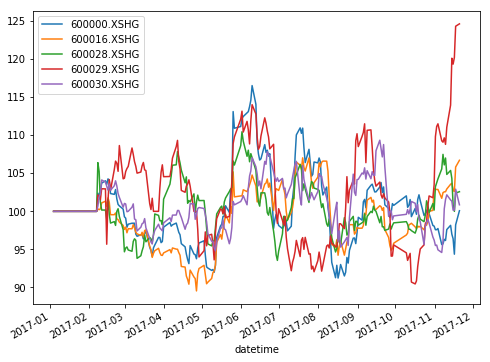

In [14]:
plt.figure(figsize=(8, 6))

for i in range(5):
    rocr10[keys[i]].plot()
    plt.legend()

plt.show()

# 题目五：
用Panel来计算50只股票的MACD并且输出MACD的Panel的MultiIndex格式


In [16]:
import talib.abstract as tab
macd = pd.Panel({name:tab.MACD(value) for name,value in PN.fillna(0).iteritems()})
macd.transpose(2,1,0).to_frame()

macd  macdsignal   macdhist
datetime            minor                                        
2017-02-24 15:00:00 600000.XSHG   0.871114    1.197907  -0.326792
                    600016.XSHG  -0.007077    0.265328  -0.272405
                    600028.XSHG   0.028081    0.052015  -0.023934
                    600029.XSHG   0.221787    0.132200   0.089587
                    600030.XSHG   0.602873    0.620235  -0.017362
                    600036.XSHG   1.291055    1.245643   0.045412
                    600048.XSHG   2.316978    1.771997   0.544982
                    600050.XSHG  -0.105248   -0.189278   0.084029
                    600100.XSHG   0.453028    0.079491   0.373537
                    600104.XSHG   2.271146    2.012658   0.258488
                    600111.XSHG   2.429090    1.926561   0.502529
                    600340.XSHG   8.025312    5.194384   2.830927
                    600485.XSHG   0.000000    0.000000   0.000000
                    600518.XSHG   1.014290    2.387216  -1.372926
                    600519.XSHG  20.810882    7.146779  13.664103
                    600547.XSHG  -0.041687    0.918715  -0.960402
                    600606.XSHG   0.298737    0.267833   0.030904
                    600837.XSHG  -1.406916   -0.673088  -0.733828
                    600887.XSHG   7.150619    7.826700  -0.676082
                    600919.XSHG   0.203864    0.155884   0.047980
                    600958.XSHG  -0.069896   -1.678327   1.608431
                    600999.XSHG   0.206569    0.203989   0.002579
                    601006.XSHG  -0.135435   -0.173164   0.037729
                    601088.XSHG   0.183388    0.266840  -0.083452
                    601166.XSHG   0.539498    0.661410  -0.121912
                    601169.XSHG   0.164487    0.169715  -0.005229
                    601186.XSHG   0.356202    0.373367  -0.017165
                    601198.XSHG   0.035657   -0.035817   0.071473
                    601211.XSHG   0.170293    0.168216   0.002077
                    601229.XSHG   0.420298    0.354342   0.065955
...                                    ...         ...        ...
2017-11-20 15:00:00 600958.XSHG  -0.017207   -0.030366   0.013158
                    600999.XSHG  -0.316469   -0.361278   0.044810
                    601006.XSHG  -0.031503   -0.035473   0.003970
                    601088.XSHG   1.515106    1.323196   0.191910
                    601166.XSHG  -0.397310   -0.514731   0.117421
                    601169.XSHG  -0.060873   -0.101304   0.040431
                    601186.XSHG  -0.102098   -0.051427  -0.050671
                    601198.XSHG  -0.240666   -0.276337   0.035671
                    601211.XSHG  -0.228540   -0.260129   0.031589
                    601229.XSHG  -0.569227   -0.348796  -0.220430
                    601288.XSHG  -0.050925   -0.046703  -0.004222
                    601318.XSHG   9.177855    7.405553   1.772302
                    601328.XSHG  -0.078237   -0.087515   0.009278
                    601336.XSHG   3.017400    2.223956   0.793444
                    601390.XSHG  -0.051329    0.003959  -0.055288
                    601398.XSHG  -0.042961   -0.034460  -0.008502
                    601601.XSHG   2.358322    1.947435   0.410887
                    601628.XSHG   1.516911    1.445633   0.071278
                    601668.XSHG  -0.064400   -0.036614  -0.027786
                    601688.XSHG  -0.487274   -0.473025  -0.014250
                    601766.XSHG   0.110179    0.231906  -0.121726
                    601788.XSHG  -0.133310   -0.125970  -0.007340
                    601800.XSHG  -0.328193   -0.232894  -0.095299
                    601818.XSHG  -0.010007   -0.022297   0.012290
                    601857.XSHG   0.020054    0.073234  -0.053180
                    601881.XSHG  -0.471916   -0.403341  -0.068576
                    601901.XSHG  -0.106855   -0.094523  -0.012332
                    601985.XSHG  -0.017573    0.024240  -0.041813
            